### Problem 2
#### Prediction Model for Salary Hike

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf

In [2]:
dataset = pd.read_csv('Salary_Data.csv')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [3]:
dataset

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [4]:
dataset.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


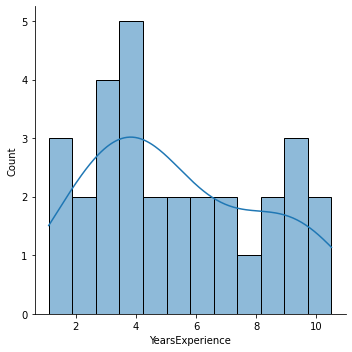

In [5]:
sns.displot(dataset['YearsExperience'], kde=True, bins=12)

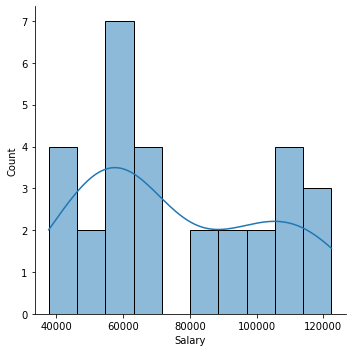

In [6]:
sns.displot(dataset['Salary'], kde=True, bins=10)

<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

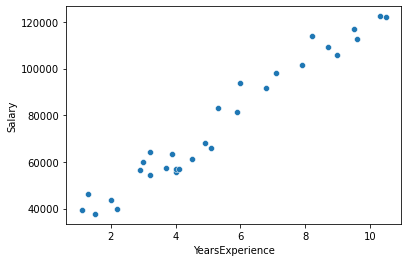

In [7]:
sns.scatterplot(x="YearsExperience", y="Salary", data=dataset)

In [8]:
model = smf.ols("Salary~YearsExperience",data = dataset).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Mon, 21 Jun 2021   Prob (F-statistic):           1.14e-20
Time:                        16:19:40   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

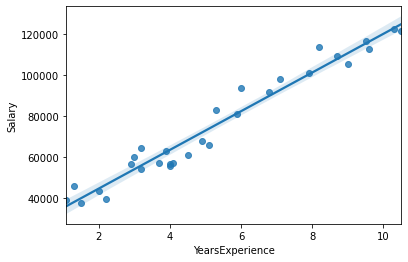

In [9]:
sns.regplot(x="YearsExperience", y="Salary", data=dataset);

## Alternate Method
### Using scikit-learn Package

In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
y = dataset['Salary']
x = [[i] for i in dataset['YearsExperience']]
x

[[1.1],
 [1.3],
 [1.5],
 [2.0],
 [2.2],
 [2.9],
 [3.0],
 [3.2],
 [3.2],
 [3.7],
 [3.9],
 [4.0],
 [4.0],
 [4.1],
 [4.5],
 [4.9],
 [5.1],
 [5.3],
 [5.9],
 [6.0],
 [6.8],
 [7.1],
 [7.9],
 [8.2],
 [8.7],
 [9.0],
 [9.5],
 [9.6],
 [10.3],
 [10.5]]

In [12]:
model1 = LinearRegression() 
model1.fit(x,y)

LinearRegression()

In [13]:
model1.score(x,y)

0.9569566641435086

### Inferences:
The mode has an R-squared value of 0.957 which means that 95.7% of the salary can be predicteed from the years of experience alone. Hence the results of prediction should be near-accurate values.

In [14]:
predict = np.array([[6.5]])
model1.predict(predict)
#Predicting the salary for years of exp = 6.5 with sklearn model

array([87216.95528813])

In [15]:
predict1 = pd.Series([6.5, 6.6, 3.6])
predictdf=pd.DataFrame(predict1,columns=['YearsExperience'])
model.predict(predictdf)
#Predicting the salary for years of exp = 6.5 with smf model

0    87216.955288
1    88161.951520
2    59812.064556
dtype: float64